<a href="https://colab.research.google.com/github/2303a51019/NLP/blob/main/NLP_LAB_O9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Load and Inspect Dataset

In [ ]:
# Q1: Load the BBC News dataset
import pandas as pd

# Load CSV (must be in same folder)
df = pd.read_csv("/content/bbc_news.csv")
df.head()


,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


Q2. Text Preprocessing

In [ ]:
# Q2: Preprocess text (tokenization, stopword removal, lemmatization)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower() # Convert to string to handle potential non-string types
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

df["clean_text"] = df["description"].apply(preprocess)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,pubDate,guid,link,description,clean_text
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,ukrainian president say country forgive forget...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen frontline irpin resident came rus...
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,one world biggest fertiliser firm say conflict...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,parent manchester arena bombing youngest victi...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,consumer feeling impact higher energy cost fue...


Q3. Apply LDA (Latent Dirichlet Allocation)

In [ ]:
# Q3: LDA Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(df["clean_text"])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(dtm)

# Display top words per topic
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)


Topic 1:  ['league', 'manchester', 'say', 'city', 'england', 'united', 'premier', 'win', 'ukraine', 'liverpool']
Topic 2:  ['say', 'people', 'bbc', 'government', 'election', 'pay', 'new', 'president', 'strike', 'israel']
Topic 3:  ['world', 'england', 'cup', 'win', 'final', 'day', 'bbc', 'year', 'say', 'womens']
Topic 4:  ['minister', 'new', 'year', 'party', 'leader', 'paper', 'government', 'say', 'prime', 'plan']
Topic 5:  ['say', 'people', 'police', 'year', 'died', 'bbc', 'home', 'russian', 'man', 'attack']


Q4. Apply NMF (Non-negative Matrix Factorization)

In [ ]:
# Q4: NMF Topic Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

nmf_model = NMF(n_components=5, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf)

display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)


Topic 1:  ['say', 'people', 'police', 'ukraine', 'attack', 'russia', 'home', 'russian', 'died', 'woman']
Topic 2:  ['world', 'cup', 'england', 'win', 'final', 'womens', 'watch', 'wale', 'australia', 'euro']
Topic 3:  ['day', 'seven', 'past', 'going', 'closely', 'paying', 'attention', 'whats', 'selection', 'image']
Topic 4:  ['league', 'manchester', 'city', 'premier', 'united', 'champion', 'win', 'liverpool', 'arsenal', 'season']
Topic 5:  ['year', 'bbc', 'new', 'minister', 'election', 'government', 'prime', 'leader', 'party', 'tell']


Q5. Compare Topic Coherence (LDA vs NMF)

In [ ]:
!pip install gensim



Q6. Visualization & Topic Assignment (10 Example Articles)

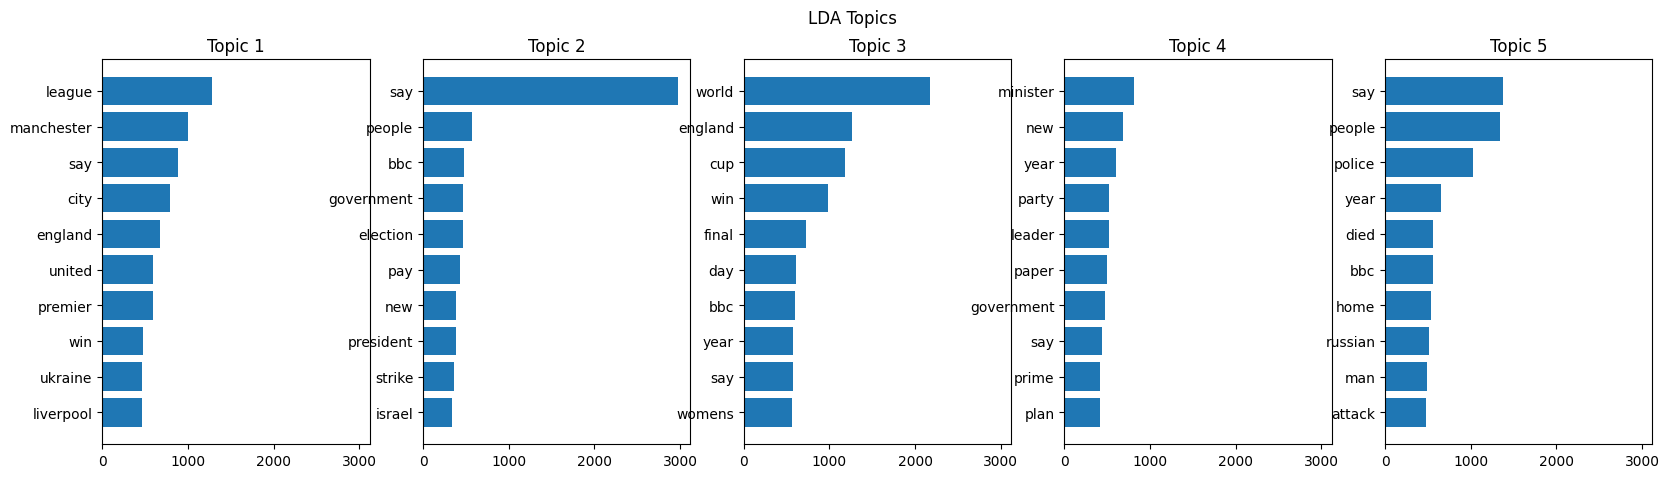

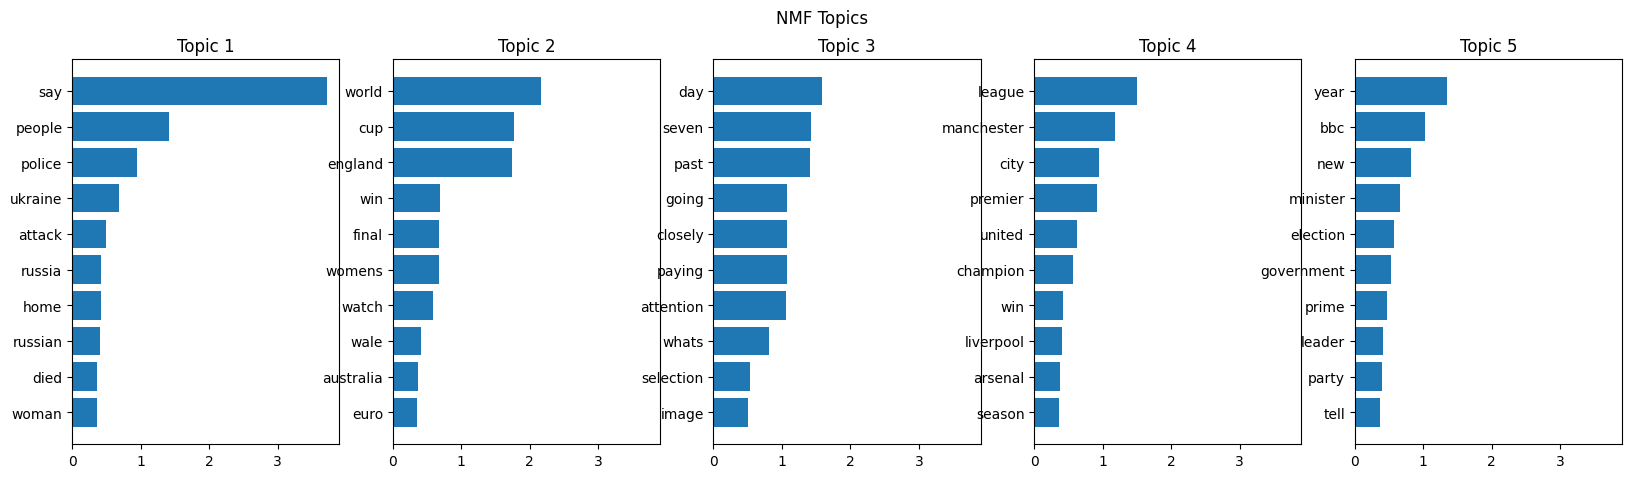

In [ ]:
# Q6a: Visualize top keywords per topic
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        weights = topic[topic.argsort()[:-n_top_words - 1:-1]]
        ax = axes[topic_idx]
        ax.barh(top_features[::-1], weights[::-1])
        ax.set_title(f"Topic {topic_idx + 1}")
    plt.suptitle(title)
    plt.show()

plot_top_words(lda_model, count_vectorizer.get_feature_names_out(), 10, "LDA Topics")
plot_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10, "NMF Topics")


In [ ]:
# Q6b: Assign topics to 10 example articles
import numpy as np

df["LDA_Topic"] = np.argmax(lda_topics, axis=1)
df["NMF_Topic"] = np.argmax(nmf_topics, axis=1)

df[["description", "clean_text", "LDA_Topic", "NMF_Topic"]].sample(10, random_state=42)

,description,clean_text,LDA_Topic,NMF_Topic
24790,"Michigan Democrat defends pro-Palestinian ""riv...",michigan democrat defends propalestinian river...,4,4
29911,Mark Lang was killed by a man who was stealing...,mark lang killed man stealing parcel delivery van,4,0
21220,"Sarah Moulds also criticises the RSPCA, saying...",sarah mould also criticises rspca saying press...,1,4
16716,Backers who want Wrexham to win City of Cultur...,backer want wrexham win city culture status ho...,0,3
32850,Hamas said it was sending negotiators to talks...,hamas said sending negotiator talk positive sp...,1,4
20177,But performance by parent company AB/Inbev hol...,performance parent company abinbev hold better...,1,4
11899,A marathon debate on controversial gender refo...,marathon debate controversial gender reform en...,3,4
32102,An impartial 12-person jury is needed for his ...,impartial person jury needed first criminal tr...,4,4
18734,Gathering as much debris as possible is essent...,gathering much debris possible essential worki...,4,4
17020,They agree to allow safe passage for civilians...,agree allow safe passage civilian protect reli...,1,4
